In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [14]:
n = 4
x_initial = 0
y_initial = 0
v = 1
t_max = 1
dt = 0.001
a = 50

In [15]:
def x_derivative(x, y):
    return v * (a - x - y) / math.sqrt((a - x - y) ** 2 + (x - y) ** 2)


def y_derivative(x, y):
    return v * (x - y) / math.sqrt((a - x - y) ** 2 + (x - y) ** 2)

In [16]:
def runge_kutta2(x, y, t):
    k1x = x_derivative(x, y) * t
    k1y = y_derivative(x, y) * t
    k2x = x_derivative(x + k1x, y + k1y) * t
    k2y = y_derivative(x + k1x, y + k1y) * t
    return x + (k1x + k2x) / 2, y + (k1y + k2y) / 2


def runge_kutta3(x, y, t):
    k1x = x_derivative(x, y) * t
    k1y = y_derivative(x, y) * t
    k2x = x_derivative(x + 1/2 * k1x, y + 1/2 * k1y) * t
    k2y = y_derivative(x + 1/2 * k1x, y + 1/2 * k1y) * t
    k3x = x_derivative(x + k2x, y - k1y + 2 * k2y) * t
    k3y = y_derivative(x + k2x, y - k1y + 2 * k2y) * t
    return x + (k1x + 4 * k2x + k3x) / 6, y + (k1y + 4 * k2y + k3y) / 6


def runge_kutta4(x, y, t):
    k1x = x_derivative(x, y) * t
    k1y = y_derivative(x, y) * t
    k2x = x_derivative(x + 1/2 * k1x, y + 1/2 * k1y) * t
    k2y = y_derivative(x + 1/2 * k1x, y + 1/2 * k1y) * t
    k3x = x_derivative(x + 1/2 * k2x, y + 1/2 * k2y) * t
    k3y = y_derivative(x + 1/2 * k2x, y + 1/2 * k2y) * t
    k4x = x_derivative(x + k3x, y + k3y) * t
    k4y = y_derivative(x + k3x, y + k3y) * t
    return x + (k1x + 2*k2x + 2*k3x + k4x) / 6, y + (k1y + 2*k2y + 2*k3y + k4y) / 6

In [20]:
x_list = [x_initial]
y_list = [y_initial]

for i in range(int(t_max / dt)):
    temp = runge_kutta2(x_list[i], y_list[i], i * dt)
    x_list.append(temp[0])
    y_list.append(temp[1])
print(y_list)
x_list = np.array(x_list)
y_list = np.array(y_list)

all_x_list = [x_list, a - y_list, a - x_list, y_list]
all_y_list = [y_list, x_list, a - y_list, a - x_list]

[0, 0.0, 1.000020000199996e-08, 9.000300008599996e-08, 3.600192009140152e-07, 1.000080005554164e-06, 2.2502550243049376e-06, 4.410676285039812e-06, 7.841568252432405e-06, 1.2963283860262431e-05, 2.0256346561842745e-05, 3.0261498404447766e-05, 4.357975413446363e-05, 6.0872461340820305e-05, 8.286136664510596e-05, 0.0001103286879476036, 0.00014411719273932995, 0.00018513028249099607, 0.00023433208313064898, 0.00029274754162259285, 0.0003614625286610275, 0.00044162394749268103, 0.0005344398488835523, 0.0006411795522457161, 0.0007631737729409855, 0.0009018147557790565, 0.0010585564147286054, 0.0012349144788606388, 0.0014324666445442356, 0.0016528527339156544, 0.0018977748596426113, 0.00216899759600637, 0.002468348156325113, 0.002797716576742899, 0.003159055906409333, 0.0035543824040759064, 0.0039857757411357955, 0.0044553792111347145, 0.004965399945781262, 0.005518109137485991, 0.006115842268459277, 0.0067609993463988525, 0.007456045146798685, 0.008203509461911698, 0.009005987356399615, 0.0

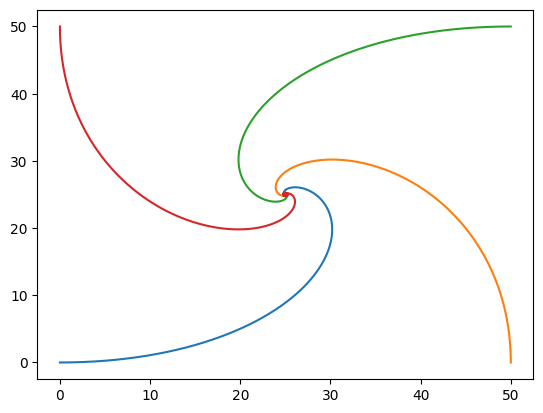

In [18]:
for i in range(n):
    plt.plot(all_x_list[i], all_y_list[i])
plt.show()